<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

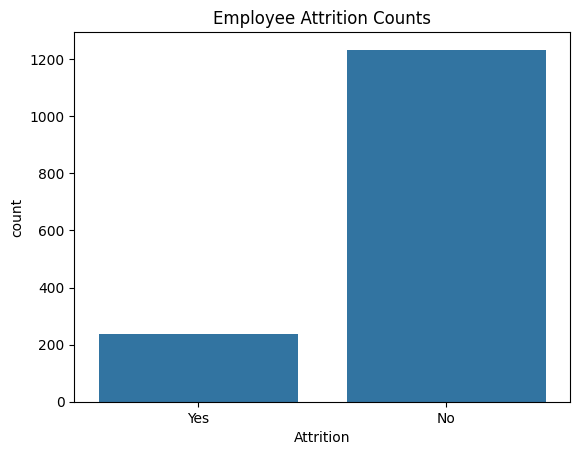

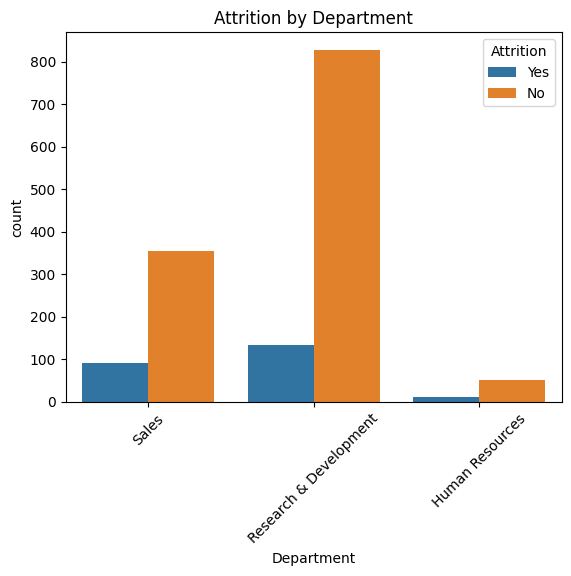

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       255
           1       0.50      0.05      0.09        39

    accuracy                           0.87       294
   macro avg       0.69      0.52      0.51       294
weighted avg       0.82      0.87      0.82       294



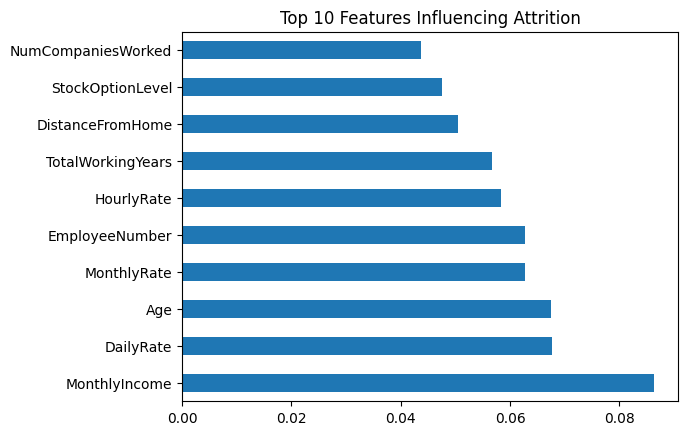

In [9]:
import pandas as pd

df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

# See the shape and column info
df.shape
df.info()

# Preview the first few rows
df.head()

# Any missing data?
df.isnull().sum()

# Count of 'Yes' vs. 'No'
df['Attrition'].value_counts()

# Plot it
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Attrition')
plt.title('Employee Attrition Counts')
plt.show()

# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

# Copy numeric columns
df_model = df.select_dtypes(include=['int64', 'float64']).copy()

# Convert Attrition to binary
df_model['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Influencing Attrition')
plt.show()


